In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("Micro-credit-Data-file.csv")

data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
data.shape

(209593, 37)

In [4]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
data.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Fill or drop missing values as needed
data = data.fillna(0)  # Example: replace NaNs with 0. You may need custom handling here.


Missing values in each column:
 Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype:

In [8]:
# Replace 'label' with target (1 for non-defaulter, 0 for defaulter)
if 'label' in data.columns:
    data['target'] = data['label'].apply(lambda x: 1 if x == 1 else 0)
    data.drop(columns=['label'], inplace=True)
else:
    print("Error: 'label' column not found in the dataset. Please verify the target column name.")


In [9]:
# Example feature engineering: Loan ratio over the last 30 and 90 days
if 'amnt_loans30' in data.columns and 'amnt_loans90' in data.columns:
    data['loan_ratio_30_90'] = data['amnt_loans30'] / (data['amnt_loans90'] + 1e-5)
else:
    print("Error: 'amnt_loans30' or 'amnt_loans90' columns missing. Adjust feature engineering accordingly.")


In [10]:
non_essential_columns = ['msisdn', 'pcircle', 'pdate']
data = data.drop(columns=[col for col in non_essential_columns if col in data.columns], errors='ignore')


In [11]:
X = data.drop(columns=['target'])
y = data['target']


In [12]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'MLP': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression()),
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier())
        ],
        voting='soft'
    )
}

# Adding different parameter variations for key models
for depth in [3, 5, 7]:
    models[f'Random Forest (depth={depth})'] = RandomForestClassifier(max_depth=depth)
    models[f'Extra Trees (depth={depth})'] = ExtraTreesClassifier(max_depth=depth)

for neighbors in [3, 5, 7]:
    models[f'KNN (n={neighbors})'] = KNeighborsClassifier(n_neighbors=neighbors)

for layers in [(50,), (100,), (50, 50)]:
    models[f'MLP (layers={layers})'] = MLPClassifier(hidden_layer_sizes=layers)

# For simplicity, adding specific versions for some models
models.update({
    'Gradient Boosting (depth=3)': GradientBoostingClassifier(max_depth=3),
    'AdaBoost (n=50)': AdaBoostClassifier(n_estimators=50),
    'XGBoost (depth=3)': XGBClassifier(max_depth=3),
    'LightGBM (depth=3)': LGBMClassifier(max_depth=3),
})


Training Logistic Regression...
Logistic Regression - Accuracy: 0.8758071185470275
Training Random Forest...
Random Forest - Accuracy: 0.9134196380291995
Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.9078214955946436
Training Support Vector Classifier...
Support Vector Classifier - Accuracy: 0.8761888100766564
Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.8744552943795922
Training Naive Bayes...
Naive Bayes - Accuracy: 0.593212252298101
Training Decision Tree...
Decision Tree - Accuracy: 0.8644676993543051
Training LDA...
LDA - Accuracy: 0.8746461401444067
Training QDA...
QDA - Accuracy: 0.5001431343236108
Training AdaBoost...
AdaBoost - Accuracy: 0.9023982951111676
Training Bagging...
Bagging - Accuracy: 0.9045930214065333
Training Extra Trees...
Extra Trees - Accuracy: 0.9080441489869271
Training MLP...
MLP - Accuracy: 0.8811189923343618
Training XGBoost...
XGBoost - Accuracy: 0.9137536181176246
Training LightGBM...
[LightGBM] [Info] Number of posi

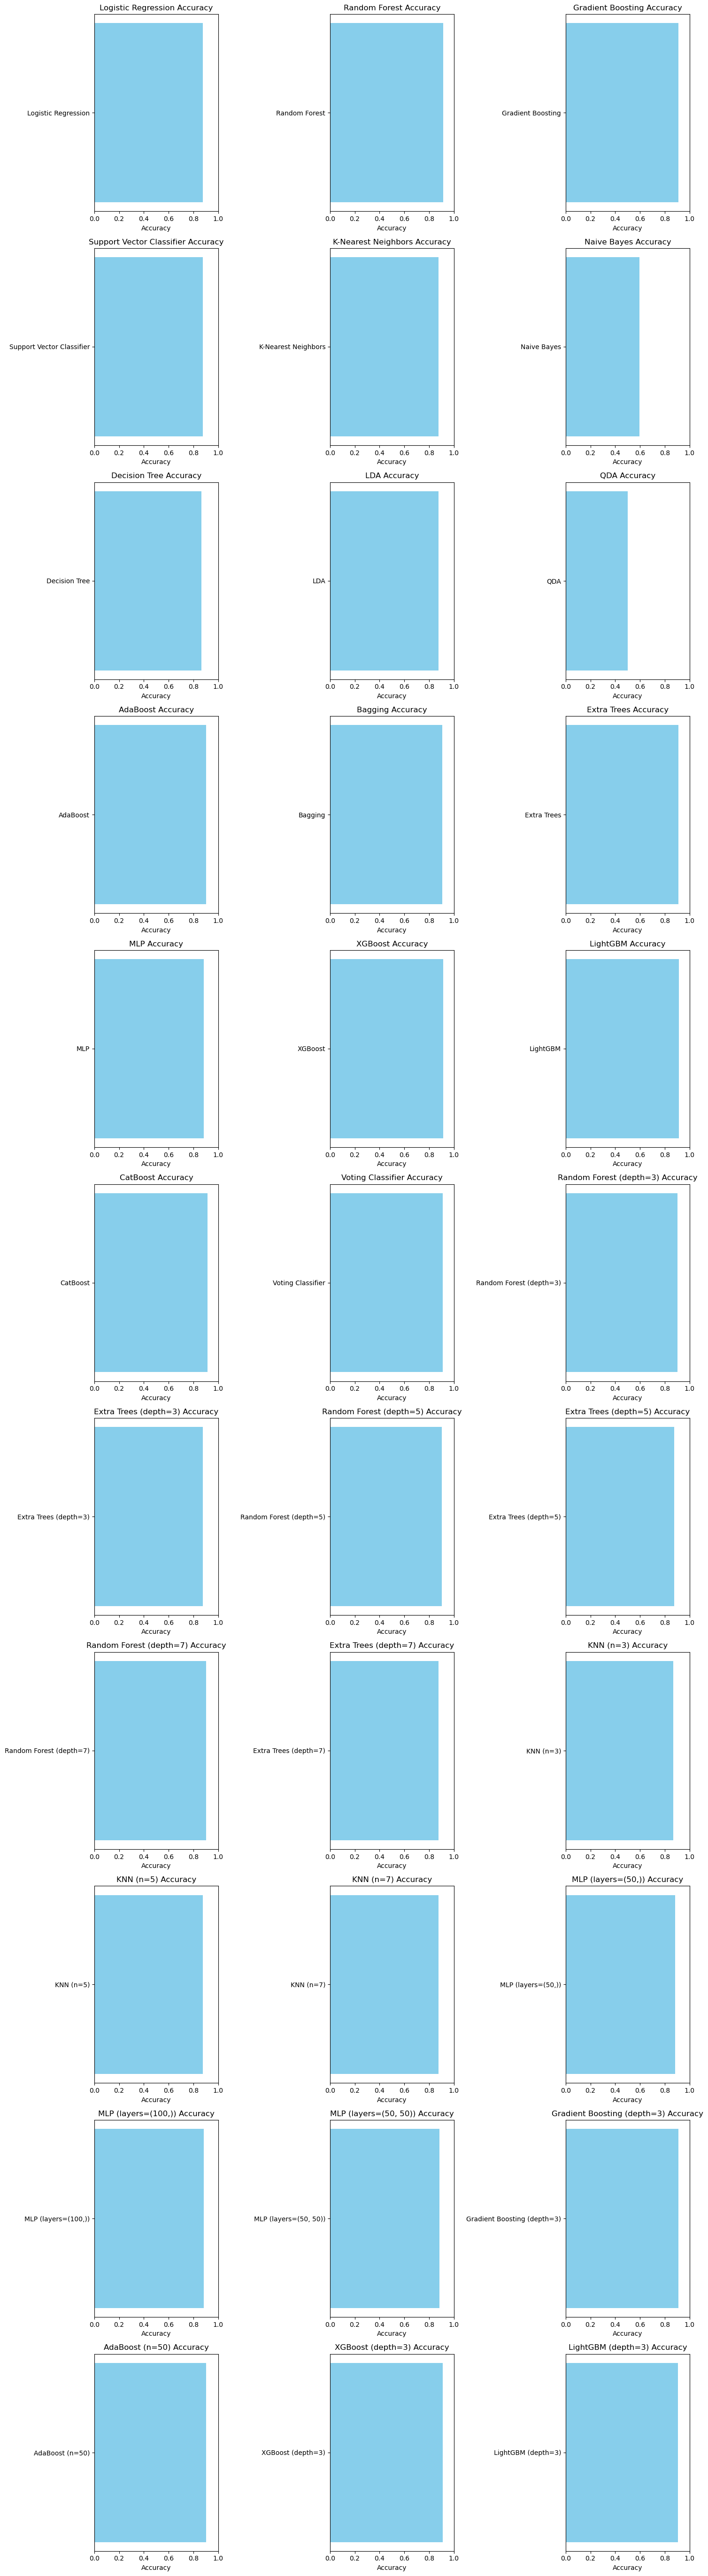

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize results dictionary
results = {}

# Loop over each model, train, predict, and evaluate
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} - Accuracy: {accuracy}")

# Set up a figure with subplots
num_models = len(results)
cols = 3  # Number of columns for subplots
rows = (num_models + cols - 1) // cols  # Calculate the number of rows needed

plt.figure(figsize=(15, rows * 5))  # Adjust height based on number of models

# Create a small bar chart for each model
for i, (model_name, accuracy) in enumerate(results.items()):
    plt.subplot(rows, cols, i + 1)  # Create a subplot
    plt.barh(model_name, accuracy, color='skyblue')
    plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
    plt.xlabel('Accuracy')
    plt.title(f'{model_name} Accuracy')

# Show the overall layout
plt.tight_layout()
plt.show()



Top 10 Models by Accuracy:
CatBoost: 0.9146442316867585
XGBoost: 0.9137536181176246
Random Forest: 0.9134196380291995
LightGBM: 0.9131015617545087
XGBoost (depth=3): 0.9099685104488057
Voting Classifier: 0.9098730875663984
Extra Trees: 0.9080441489869271
Gradient Boosting: 0.9078214955946436
Gradient Boosting (depth=3): 0.9078214955946436
LightGBM (depth=3): 0.906787747701899


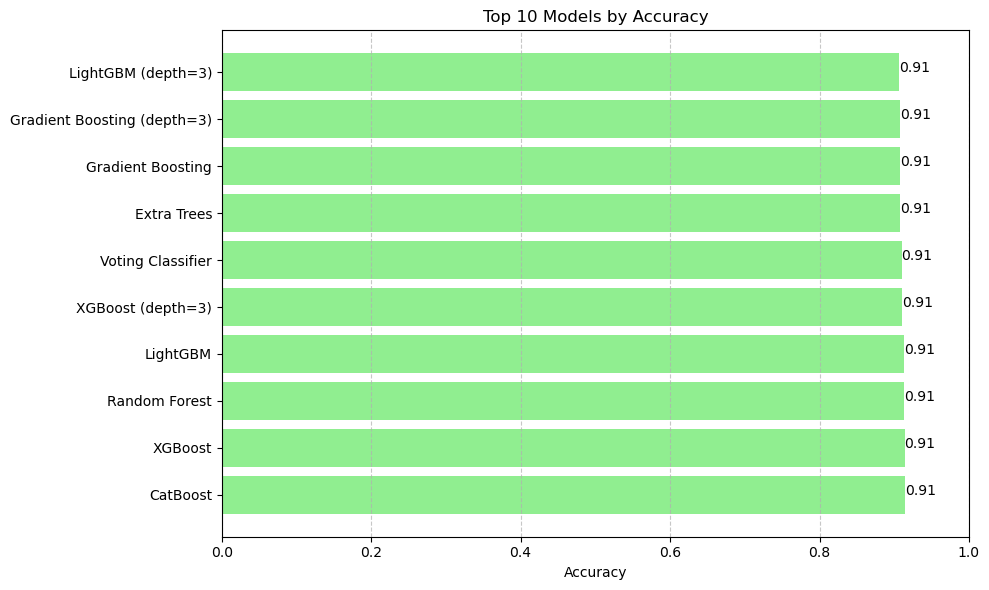

In [16]:
# Sort models by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 models by accuracy
print("\nTop 10 Models by Accuracy:")
for name, accuracy in sorted_results[:10]:
    print(f"{name}: {accuracy}")

# Prepare data for visualization
top_models = sorted_results[:10]  # Get top 10 models
model_names = [name for name, _ in top_models]
accuracies = [accuracy for _, accuracy in top_models]

# Create a bar chart for the top models
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='lightgreen')
plt.xlabel('Accuracy')
plt.title('Top 10 Models by Accuracy')
plt.xlim(0, 1)  # Set x-axis limits for accuracy
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the accuracy values on the bars
for index, value in enumerate(accuracies):
    plt.text(value, index, f"{value:.2f}")

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
# Perform cross-validation on top 5 models
print("\nCross-Validation for Top 5 Models:")
top_models = sorted_results[:5]
cv_means = []
cv_stds = []

for name, _ in top_models:
    model = models[name]
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    std_accuracy = cv_scores.std()
    cv_means.append(mean_accuracy)
    cv_stds.append(std_accuracy)
    print(f"{name} - CV Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")

# Create a bar chart for cross-validation results
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(top_models))

# Create bars for mean accuracies
bars = plt.bar(index, cv_means, bar_width, color='lightblue', label='Mean Accuracy')

# Add error bars for standard deviation
plt.errorbar(index, cv_means, yerr=cv_stds, fmt='o', color='black', capsize=5, label='Standard Deviation')

# Customize the chart
plt.xlabel('Models')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Accuracy for Top 5 Models')
plt.xticks(index, [name for name, _ in top_models])
plt.ylim(0, 1)  # Set y-axis limits for accuracy
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Cross-Validation for Top 5 Models:
CatBoost - CV Accuracy: 0.9115 ± 0.0044
XGBoost - CV Accuracy: 0.9113 ± 0.0039
Random Forest - CV Accuracy: 0.9090 ± 0.0101


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sk947\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sk947\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1284, in fit
    super().fit(
  File "C:\Users\sk947\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 955, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\sk947\anaconda3\Lib\site-packages\lightgbm\engine.py", line 282, in train
    booster = Booster(params=params, train_set=train_set)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sk947\anaconda3\Lib\site-packages\lightgbm\basic.py", line 3637, in __init__
    train_set.construct()
  File "C:\Users\sk947\anaconda3\Lib\site-packages\lightgbm\basic.py", line 2576, in construct
    self._lazy_init(
  File "C:\Users\sk947\anaconda3\Lib\site-packages\lightgbm\basic.py", line 2208, in _lazy_init
    return self.set_feature_name(feature_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sk947\anaconda3\Lib\site-packages\lightgbm\basic.py", line 3032, in set_feature_name
    _safe_call(
  File "C:\Users\sk947\anaconda3\Lib\site-packages\lightgbm\basic.py", line 296, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode("utf-8"))
lightgbm.basic.LightGBMError: Do not support special JSON characters in feature name.
